In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [5]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [9]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-02-10')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
2012-01-10,60.857143,60.214287,60.844284,60.462856,64549100.0,52.484222
2012-01-11,60.407143,59.901428,60.382858,60.364285,53771200.0,52.398655
2012-01-12,60.414288,59.821430,60.325714,60.198570,53146800.0,52.254814
2012-01-13,60.064285,59.808571,59.957142,59.972858,56505400.0,52.058880


In [10]:
#Get the number of rows and columns in the data set
df.shape

(2039, 6)

/Users/jongwon/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


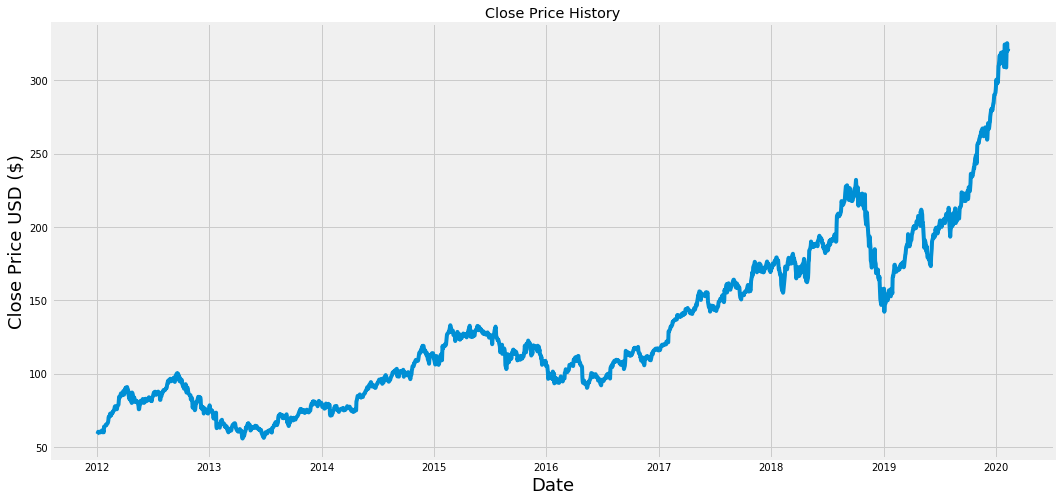

In [11]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [12]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1632

In [13]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01097596],
       [0.01214779],
       [0.01458158],
       ...,
       [1.        ],
       [0.98077354],
       [0.98641525]])

In [20]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01097596, 0.01214779, 0.01458158, 0.01689873, 0.01654347,
       0.01734413, 0.01697826, 0.01636319, 0.01552542, 0.01811828,
       0.02045664, 0.01973552, 0.01578523, 0.01955523, 0.01584355,
       0.02976234, 0.02868595, 0.0300911 , 0.03312936, 0.03496929,
       0.03481552, 0.03424817, 0.03666606, 0.03894078, 0.04151776,
       0.04568014, 0.05442379, 0.05455635, 0.05942396, 0.06306139,
       0.05680985, 0.05921715, 0.05916944, 0.06591939, 0.06495964,
       0.06673594, 0.06992798, 0.0717043 , 0.07682111, 0.0805487 ,
       0.08162507, 0.08200155, 0.07562808, 0.07409037, 0.07431838,
       0.08031007, 0.08199626, 0.08561777, 0.09415464, 0.10554419,
       0.10341262, 0.10341792, 0.11165255, 0.1142295 , 0.11239487,
       0.11071933, 0.10897484, 0.11477034, 0.11874716, 0.12041211])]
[0.11629744014859847]

[array([0.01097596, 0.01214779, 0.01458158, 0.01689873, 0.01654347,
       0.01734413, 0.01697826, 0.01636319, 0.01552542, 0.01811828,
       0.02045664, 0.01973552, 0.01

In [15]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1572, 60, 1)

In [17]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1572/1572 [==============================] - 66s 42ms/step - loss: 6.7199e-04


In [21]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
  

In [22]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [23]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [24]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [25]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

6.157183834425775

/Users/jongwon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


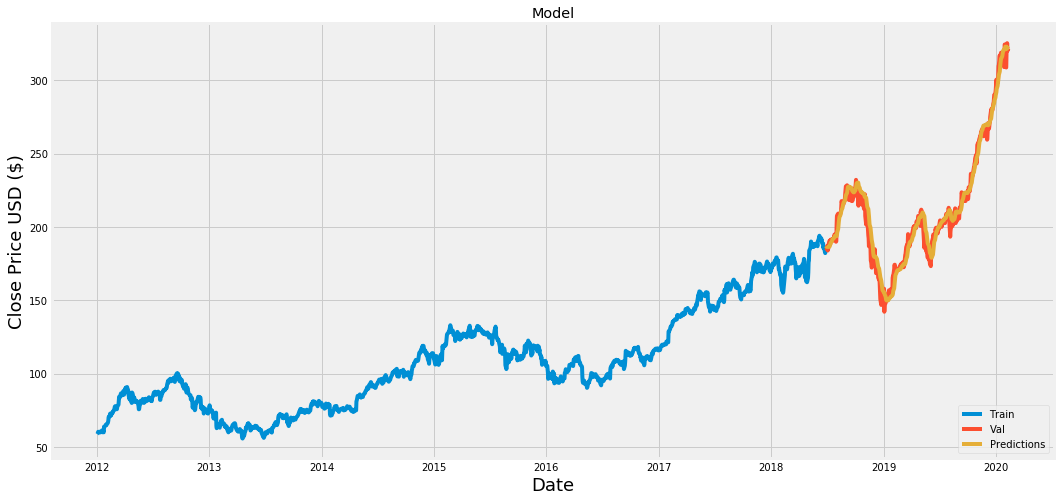

In [26]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [27]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-06-28,185.500000,186.953888
2018-06-29,185.110001,186.569305
2018-07-02,187.179993,186.337097
2018-07-03,183.919998,186.408875
2018-07-05,185.399994,186.334000
2018-07-06,187.970001,186.326675
2018-07-09,190.580002,186.595566
2018-07-10,190.350006,187.241867
2018-07-11,187.880005,188.022308


In [28]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[279.23425]]


In [29]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    279.739990
2019-12-19    280.019989
Name: Close, dtype: float64
